## Monitoring Changes in Surface Water Using Satellite Image Data
### Milestone 1: Getting Started

#### How to Download ESA Sentinel 2 Satellite Images

A good way to get oriented with satellite imagery is to interact with [ESA Sentinel 2](https://en.wikipedia.org/wiki/Sentinel-2) data. As shown in the Wikipedia link, Sentinel-2 is an Earth observation mission from the Copernicus Programme that systematically acquires optical imagery at high spatial resolution (10 m to 60 m) over land and coastal waters. 

Check out the [Copernicus Open Access Hub](https://scihub.copernicus.eu/) for free and open access to all Sentinel-2 data products! Below I've included the Youtube video I used to find satellite data for the Amhara region in Ethiopia!


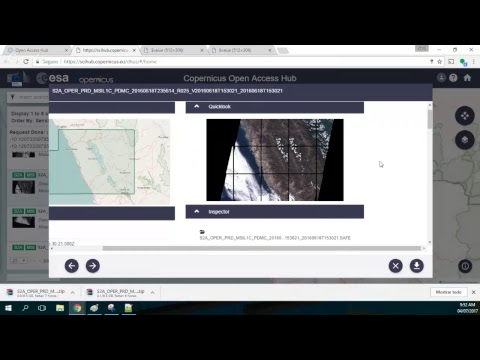

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('XcW1wpegenE')

#### Read satellite data in using Rasterio

If you are using Google Colab for the first time, watch the following Youtube video to load in your data to Google Drive and subsequently import it to the notebook:

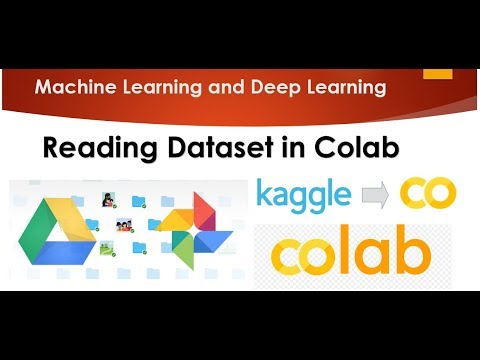

In [2]:
YouTubeVideo('Gvwuyx_F-28')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install rasterio

In [5]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
imagePath = '/content/drive/My Drive/Colab Notebooks/satellite_images/'
band2 = rasterio.open(imagePath + 'T37PBP_20200630T074619_B02_10m.jp2', driver = 'JP2OpenJPEG')
band3 = rasterio.open(imagePath + 'T37PBP_20200630T074619_B03_10m.jp2', driver = 'JP2OpenJPEG')
band4 = rasterio.open(imagePath + 'T37PBP_20200630T074619_B04_10m.jp2', driver = 'JP2OpenJPEG')
TCI = rasterio.open(imagePath + 'T37PBP_20200630T074619_TCI.jp2', driver = 'JP2OpenJPEG')

I only read in bands 2, 3, and 4. To learn more about spectral bands and their spectral signatures, I found this [GIS Geography link](https://gisgeography.com/spectral-signature/) helpful.




Now, using band2 as an example, I use attributes to access meta data of the raster data:

In [7]:
band2.count

1

In [8]:
band2.width

10980

In [9]:
band2.height

10980

In [10]:
band2.transform

Affine(10.0, 0.0, 199980.0,
       0.0, -10.0, 1400040.0)

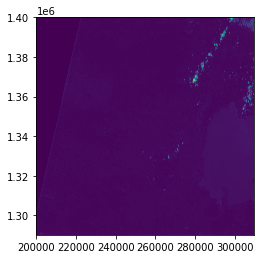

In [11]:
plot.show(band2)

### Show each band of the image

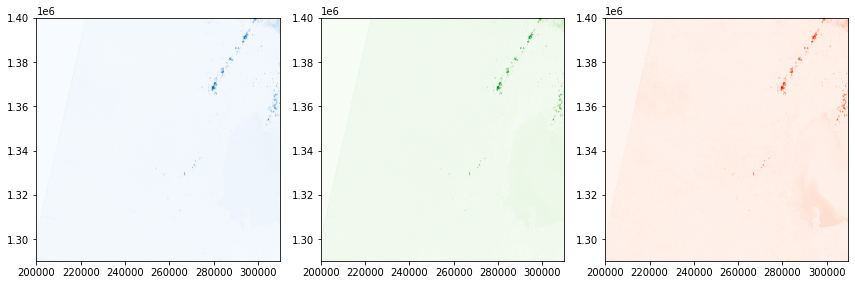

In [12]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
plot.show(band2, ax=ax1, cmap='Blues')
plot.show(band3, ax=ax2, cmap='Greens')
plot.show(band4, ax=ax3, cmap='Reds')
fig.tight_layout()

### Use the blue, green, and red bands to create the True Color image

This is downloaded as a .tiff file called SentinelTrueColor. The file can be viewed by QGIS software.

In [13]:
trueColor = rasterio.open(imagePath + 'SentinelTrueColor.tiff', 'w', driver='Gtiff',
                          width = band4.width, height=band4.height,
                          count=3,
                          crs=band4.crs,
                          transform=band4.transform,
                          dtype=band4.dtypes[0]
                          )
trueColor.write(band2.read(1),3) #blue
trueColor.write(band3.read(1), 2) #green
trueColor.write(band4.read(1), 1) #red
trueColor.close()

#### Let's check out the True Image histogram

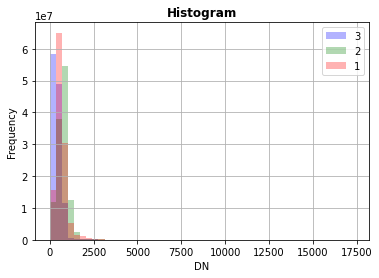

In [14]:
trueColor = rasterio.open(imagePath + 'SentinelTrueColor.tiff')
plot.show_hist(trueColor, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title='Histogram')

Now to plot the trueColor image. We are only seeing 1 band, but can see the full image in GIS. 

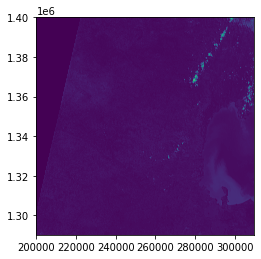

In [39]:
plot.show(trueColor)

#### A look at the original downloaded TCI file 



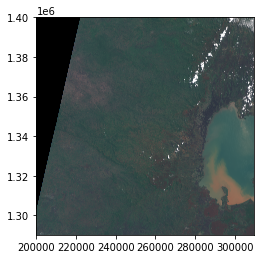

In [17]:
plot.show(TCI)

In [40]:
TCI.profile

{'driver': 'JP2OpenJPEG', 'dtype': 'uint8', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 3, 'crs': CRS.from_epsg(32637), 'transform': Affine(10.0, 0.0, 199980.0,
       0.0, -10.0, 1400040.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'interleave': 'pixel'}

### Demonstration of a function that carries out a manipulation of that image using Keras and TensorFlow 2.0

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

In [22]:
# Prevents DecompressionBombWarning due to exceeding limit of 89,478,485 pixels

original_size = (TCI.profile['height'], TCI.profile['width'])
display(original_size)
scale = 10
new_size = (int(original_size[0]/scale), int(original_size[1]/scale))
new_size

(10980, 10980)

(1098, 1098)

In [23]:
image = tf.keras.preprocessing.image.load_img('/content/drive/My Drive/Colab Notebooks/satellite_images/T37PBP_20200630T074619_TCI.jp2', target_size= new_size)


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (120560400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


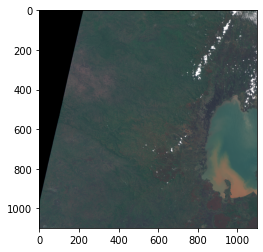

In [24]:
plt.imshow(image)

#### Convert the image into an array for easier manipulation

In [27]:
image_3D_array = tf.keras.preprocessing.image.img_to_array(image)

In [28]:
image_3D_array

array([[[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [ 68.,  91.,  87.],
        [116., 135., 139.],
        [159., 167., 171.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [118., 131., 129.],
        [112., 119., 118.],
        [144., 158., 167.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [152., 158., 160.],
        [114., 128., 127.],
        [166., 170., 171.]],

       ...,

       [[ 60.,  75.,  77.],
        [ 61.,  71.,  77.],
        [ 58.,  72.,  75.],
        ...,
        [ 63.,  60.,  65.],
        [ 62.,  56.,  64.],
        [ 54.,  58.,  66.]],

       [[ 54.,  71.,  74.],
        [ 60.,  70.,  77.],
        [ 54.,  63.,  73.],
        ...,
        [ 63.,  57.,  64.],
        [ 64.,  60.,  66.],
        [ 59.,  60.,  67.]],

       [[ 62.,  67.,  74.],
        [ 55.,  73.,  75.],
        [ 61.,  

#### Use tensorflow method to adjust contrast of RGB or grayscale images


In [29]:
contrast_image = tf.image.adjust_contrast(image_3D_array, 2)
contrast_image

<tf.Tensor: shape=(1098, 1098, 3), dtype=float32, numpy=
array([[[-56.668034, -70.22453 , -69.14796 ],
        [-56.668034, -70.22453 , -69.14796 ],
        [-56.668034, -70.22453 , -69.14796 ],
        ...,
        [ 79.33197 , 111.77547 , 104.85204 ],
        [175.33197 , 199.77547 , 208.85205 ],
        [261.33197 , 263.77545 , 272.85205 ]],

       [[-56.668034, -70.22453 , -69.14796 ],
        [-56.668034, -70.22453 , -69.14796 ],
        [-56.668034, -70.22453 , -69.14796 ],
        ...,
        [179.33197 , 191.77547 , 188.85205 ],
        [167.33197 , 167.77547 , 166.85205 ],
        [231.33197 , 245.77547 , 264.85205 ]],

       [[-56.668034, -70.22453 , -69.14796 ],
        [-56.668034, -70.22453 , -69.14796 ],
        [-56.668034, -70.22453 , -69.14796 ],
        ...,
        [247.33197 , 245.77547 , 250.85205 ],
        [171.33197 , 185.77547 , 184.85205 ],
        [275.33197 , 269.77545 , 272.85205 ]],

       ...,

       [[ 63.331966,  79.77547 ,  84.85204 ],
        [ 6

#### As you can see, this image is more useful for further analysis and classification!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


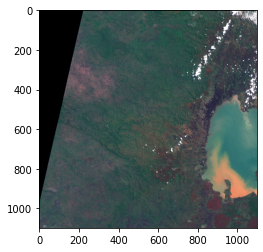

In [30]:
plt.imshow(contrast_image/255)

### References 
*   [Sentinel 2](https://en.wikipedia.org/wiki/Sentinel-2)
*   [Copernicus Open Access Hub](https://scihub.copernicus.eu/)
*   [How to Read Dataset in Google Colab from Google Drive](https://www.youtube.com/watch?v=Gvwuyx_F-28)
*   [Sentinel2 images exploration and processing with Python and Rasterio - Tutorial](https://www.youtube.com/watch?v=3kj8uoOlwjg)
*   [tf.image.adjust_contrast](https://www.tensorflow.org/api_docs/python/tf/image/adjust_contrast)



